In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb
import sklearn.linear_model as sklm 
import sklearn.decomposition as skdc
import sklearn.pipeline as skpl
%matplotlib inline

In [2]:
import Comet_Removal
%run Comet_Removal

print(len(data))
data.head()

181


,﻿Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,419880 (2011 AH37),01/07/2011,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo
2,414772 (2010 OC103),07/28/2010,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo
3,414746 (2010 EH20),03/06/2010,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor
4,407324 (2010 OB101),07/18/2010,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo


In [3]:
#standardization
def standardization(x): #Define function to standardize the data, since all variables are not in the same units
    xmean = np.mean(x) ##calculate mean
    sd = np.std(x) ##calculate standard deviation 
    x_z = (x - xmean) / sd ##calculate standardized value to return
    return(x_z)

In [4]:
#data_temp=data.drop("Designation")
data.columns=['Designation', 'Discovery Date YYYY-MM-DD', 'H (mag)',
       'MOID (AU)', 'q (AU)', 'Q (AU)', 'period (yr)', 'i (deg)', 'PHA','Orbit Class']
#data_temp=data.drop("Discovery Date YYYY-MM-DD")
#data = data.drop(['Designation','Discovery Date YYYY-MM-DD','PHA','Orbit Class'], 1).apply(standardization,broadcast = True) 

data.head()



,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,419880 (2011 AH37),01/07/2011,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo
2,414772 (2010 OC103),07/28/2010,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo
3,414746 (2010 EH20),03/06/2010,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor
4,407324 (2010 OB101),07/18/2010,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo


In [5]:
print(pd.get_dummies(data['Orbit Class']).head(5))
data['OrbitClass_dummies'] = pd.get_dummies(data['Orbit Class']).iloc[:,1]

#print(pd.get_dummies(data['Orbit Class'].head(1), dummy_na=True)

   Amor  Apollo  Aten
0   0.0     1.0   0.0
1   0.0     1.0   0.0
2   0.0     1.0   0.0
3   1.0     0.0   0.0
4   0.0     1.0   0.0


In [6]:
print(pd.get_dummies(data['PHA']).head(5))
data['PHA_dummies'] = pd.get_dummies(data['PHA']).iloc[:,1]

     N    Y
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0


In [7]:
datacorr = data.corr() #correlation matrix, showing correlation between each variable and all the others
data.corr().head()

,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),OrbitClass_dummies,PHA_dummies
H (mag),1.000000,-0.348351,0.066357,-0.122676,-0.061092,-0.404660,0.171101,0.080128
MOID (AU),-0.348351,1.000000,0.000562,0.691628,0.684569,0.513562,-0.170570,-0.368525
q (AU),0.066357,0.000562,1.000000,0.144295,0.159065,0.037985,-0.485099,-0.078787
Q (AU),-0.122676,0.691628,0.144295,1.000000,0.971313,0.423804,-0.062345,-0.128835
period (yr),-0.061092,0.684569,0.159065,0.971313,1.000000,0.417418,-0.096547,-0.078338


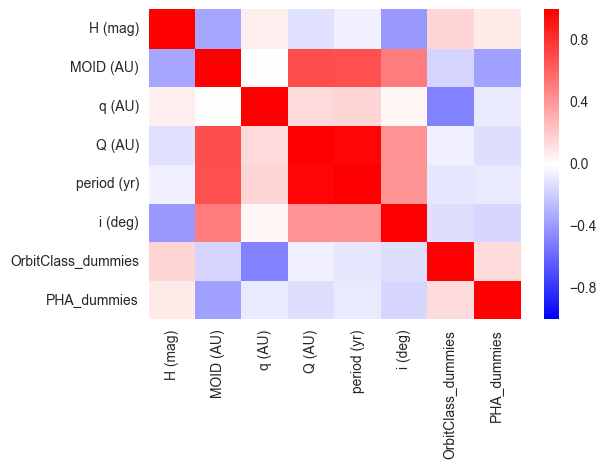

In [8]:
sb.heatmap(datacorr, cmap = 'bwr') #heatmap of correlation matrix
###darker colors represent higher correlation, several pairs of variables are highly correlated.

In [9]:

msk=np.random.rand(len(data))<0.7
training=data[msk]
test=data[~msk]
len(test)
len(training)


127

In [10]:
training.head()

,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class,OrbitClass_dummies,PHA_dummies
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo,1.0,1.0
2,414772 (2010 OC103),07/28/2010,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo,1.0,0.0
6,395207 (2010 HQ80),04/25/2010,19.6,0.007,0.80,2.34,1.96,27.85,Y,Apollo,1.0,1.0
7,386847 (2010 LR33),06/06/2010,18.0,0.029,0.91,2.48,2.20,5.84,Y,Apollo,1.0,1.0
8,381989 (2010 HR80),04/28/2010,19.9,0.104,0.68,2.02,1.56,26.71,N,Apollo,1.0,0.0


In [11]:
y=training["PHA_dummies"]
x=training.iloc[:,[2,3,4,5,6,7,10]]
#x=train[:,"Designation":"PHA"]
#x=train["Designation","Discovery Date YYYY-MM-DD","H (mag)"]
x.head()



,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),OrbitClass_dummies
1,20.5,0.028,0.93,1.08,1.00,14.52,1.0
2,19.0,0.333,0.39,2.00,1.31,23.11,1.0
6,19.6,0.007,0.80,2.34,1.96,27.85,1.0
7,18.0,0.029,0.91,2.48,2.20,5.84,1.0
8,19.9,0.104,0.68,2.02,1.56,26.71,1.0


In [12]:
pca = skdc.PCA() #empty model space

In [13]:
pcafit = pca.fit_transform(x,y) ##apply dimensionality reduction to X

In [14]:
var_explained = pca.explained_variance_ratio_ #ratio of variance each PC explains
print(pd.Series(var_explained))
### some variables are not needed
###since they explain less than.01 of the variance
print(sum(var_explained[0:10]))
##indeed,the first 2 PCs explain 99% of the variance

0    0.782251
1    0.208034
2    0.007040
3    0.001722
4    0.000767
5    0.000143
6    0.000042
dtype: float64
1.0


In [15]:
pca = skdc.PCA(0,1) #only include first 2 components
logreg = sklm.LogisticRegression(x,y)#empty model space
pipeline = skpl.Pipeline([('pca', pca), ('logistic', logreg)]) #create pipeline from pca to logregression space

In [16]:
model = LogisticRegression()
model.fit(x,y)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
model.coef_

array([[-0.00858753, -1.95651298, -0.0825224 , -0.44719817,  0.05124598,
        -0.01234616,  0.39108462]])

In [18]:
model.intercept_

array([ 0.22566928])

In [19]:
newX=test.iloc[:,[2,3,4,5,6,7,10]]

In [20]:
model.predict(newX)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [21]:
print(model.classes_)
print(model.predict_proba(newX))
k=model.predict_proba(newX)

[ 0.  1.]
[[ 0.81852161  0.18147839]
 [ 0.91821909  0.08178091]
 [ 0.72088605  0.27911395]
 [ 0.65819049  0.34180951]
 [ 0.73972042  0.26027958]
 [ 0.88774651  0.11225349]
 [ 0.93979729  0.06020271]
 [ 0.90963219  0.09036781]
 [ 0.8981773   0.1018227 ]
 [ 0.85743161  0.14256839]
 [ 0.58668663  0.41331337]
 [ 0.89455726  0.10544274]
 [ 0.9217585   0.0782415 ]
 [ 0.65022992  0.34977008]
 [ 0.91415887  0.08584113]
 [ 0.7914096   0.2085904 ]
 [ 0.93925442  0.06074558]
 [ 0.91833763  0.08166237]
 [ 0.82074325  0.17925675]
 [ 0.84776686  0.15223314]
 [ 0.82252685  0.17747315]
 [ 0.9009167   0.0990833 ]
 [ 0.94694118  0.05305882]
 [ 0.89015683  0.10984317]
 [ 0.71684034  0.28315966]
 [ 0.92200977  0.07799023]
 [ 0.89156313  0.10843687]
 [ 0.74955615  0.25044385]
 [ 0.68112121  0.31887879]
 [ 0.93022315  0.06977685]
 [ 0.71526723  0.28473277]
 [ 0.81425972  0.18574028]
 [ 0.83837646  0.16162354]
 [ 0.84755006  0.15244994]
 [ 0.73747691  0.26252309]
 [ 0.90958343  0.09041657]
 [ 0.90000634  0.0

In [22]:
k=pd.DataFrame(k)
indx = k.idxmax(axis=1)
pred_class=model.classes_[indx]
pred_class

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [23]:
newy=test["PHA_dummies"]
newy.head()



0     1.0
3     0.0
4     0.0
5     1.0
10    0.0
Name: PHA_dummies, dtype: float64

In [24]:
#newy==pred_class

In [25]:
con=confusion_matrix(newy,pred_class)
con

array([[48,  0],
       [ 6,  0]])

In [26]:
print(sum(con))
print(sum(sum(con)))

[54  0]
54


In [27]:
print(classification_report(newy,pred_class))

             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94        48
        1.0       0.00      0.00      0.00         6

avg / total       0.79      0.89      0.84        54



C:\ANACONDA3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
